In [242]:
import pandas as  pd
import numpy  as np
import matplotlib.pyplot as plt
import random

In [243]:
df  = pd.read_csv("Data/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


# Scaling the data

In [244]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()
scaled_x = sx.fit_transform(df.drop("price",axis="columns"))
scaled_y = sy.fit_transform(df['price'].values.reshape(df['price'].shape[0],1))

In [245]:
scaled_x , scaled_y

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

In [246]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [247]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

#  Batch Gradient Descent
-It uses all the training samples and adjusts the weights accordingly

In [248]:
scaled_x.T[0],scaled_x.T[1],scaled_y.reshape(scaled_y.shape[0])

(array([0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ]),
 array([0.25, 0.75, 0.5 , 0.5 , 0.25, 0.25, 0.75, 0.75, 0.5 , 1.  , 0.5 ,
        0.75, 0.25, 0.25, 0.5 , 0.25, 0.5 , 0.5 , 0.5 , 0.  ]),
 array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
        0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
        0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
        0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ]))

In [249]:
def graph(epoch_list,cost_list):
    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.plot(epoch_list,cost_list)

In [250]:
def batch_gradient_descent(area,bedrooms,price,epochs):

    w1=w2=1
    b=0
    n=len(area)
    learning_rate = .1
    cost_list = []
    epoch_list = []
    for i in range(epochs):

        y_pred =w1 * area + w2*bedrooms +b
        w1d = -2/n*(np.dot(area,(price-y_pred)))       
        w1=w1-learning_rate*w1d
        w2d = -2/n*(np.dot(bedrooms,(price-y_pred)))
        w2=w2-learning_rate*w2d
        bd = -2*np.mean(price-y_pred)
        b = b-learning_rate*bd
        cost = np.mean(np.square(price-y_pred))
        if i %5 ==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w1,w2, b,cost,cost_list,epoch_list
        
                    
                        
        
        

In [251]:
w1,w2, b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_x.T[0],scaled_x.T[1],scaled_y.reshape(scaled_y.shape[0]),100)

In [252]:
cost_list,epoch_list

([0.2768777174681,
  0.026963888725492113,
  0.015142621848227952,
  0.012993566410427749,
  0.011521234789028046,
  0.010320289685641564,
  0.009330879304359014,
  0.008514576222036248,
  0.0078402835157606,
  0.0072825153889551604,
  0.006820371823619048,
  0.006436712779016191,
  0.006117481579662423,
  0.005851150081352803,
  0.005628263679383305,
  0.005441068191662513,
  0.005283203883426208,
  0.005149454551531679,
  0.005035541760450721,
  0.004937956104987615],
 [0,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95])

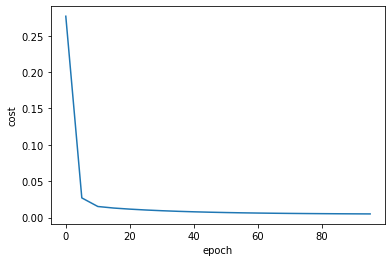

In [253]:
graph(epoch_list,cost_list)

# Predicting the values
- we should not forget to inverse transform the value

In [254]:
def predict(area,bedrooms,w1=w1,w2=w2,b=b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    scaled_y = scaled_x[0]*w1+scaled_x[1]*w2+b
    pred = sy.inverse_transform([[scaled_y]])
    print(pred[0][0])

In [255]:
predict(1056,2)

36.378312081406634


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Stochastic Gradient Descent
- it uses one randomly picked sample

In [256]:

def stochastic_gradient_descent(area,bedrooms,price,epochs):

    w1=w2=1
    b=0
    n=len(area)
    learning_rate = .1
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,n-1)
        sample_area = area[random_index]
        sample_bedrooms = bedrooms[random_index]
        sample_price = price[random_index]

        y_pred =w1 * sample_area + w2 * sample_bedrooms +b
        w1d = -2*np.mean(sample_area*(price-y_pred))       
        w1=w1-learning_rate*w1d
        w2d = -2*np.mean(sample_bedrooms*(price-y_pred))
        w2=w2-learning_rate*w2d
        bd = -2*np.mean(sample_price-y_pred)
        b = b-learning_rate*bd
        cost = np.mean(np.square(price-y_pred))
        if i %5 ==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w1,w2, b,cost,cost_list,epoch_list

In [257]:
w1,w2, b,cost,cost_list,epoch_list=stochastic_gradient_descent(scaled_x.T[0],scaled_x.T[1],scaled_y.reshape(scaled_y.shape[0]),1000)

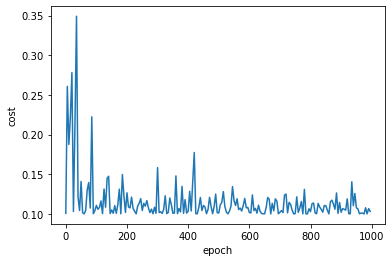

In [258]:
graph(epoch_list,cost_list)

# Mini-Batch Gradient Descent
- it uses a batch of (randomly picked) samples for a forward pass and then adjusts the weights
> For example if I have 20 training samples
>>I will use random number of random samples

In [273]:
def minibatch_gradient_descent(area,bedrooms,price,epochs):

    w1=w2=1
    b=0
    n=len(area)
    learning_rate = .1
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = 5
        sample_area_array = np.random.choice(area, size=random_index, replace=False)
        sample_bedrooms_array = np.random.choice(bedrooms, size=random_index, replace=False)
        sample_price_array = np.random.choice(price, size=random_index, replace=False)
        y_pred =w1 * sample_area_array + w2*sample_bedrooms_array +b
        w1d = -2/n*(np.dot(sample_area_array,(sample_price_array-y_pred)))       
        w1=w1-learning_rate*w1d
        w2d = -2/n*(np.dot(sample_bedrooms_array,(sample_price_array-y_pred)))
        w2=w2-learning_rate*w2d
        bd = -2*np.mean(sample_price_array-y_pred)
        b = b-learning_rate*bd
        cost = np.mean(np.square(sample_price_array-y_pred))
        if i %5 ==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w1,w2, b,cost,cost_list,epoch_list
        
                    
                        
        
        

In [274]:
w1,w2, b,cost,cost_list,epoch_list=minibatch_gradient_descent(scaled_x.T[0],scaled_x.T[1],scaled_y.reshape(scaled_y.shape[0]),100)

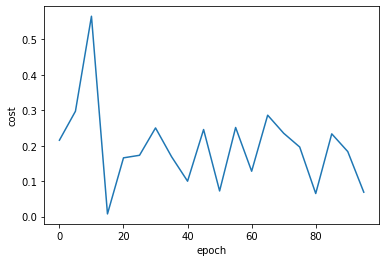

In [275]:
graph(epoch_list,cost_list)

In [272]:
np.random.permutation(20)

array([ 8, 13, 15,  6, 17, 10,  3,  5, 19, 11, 12,  4,  0, 14,  7,  1,  9,
       18, 16,  2])